<a href="https://colab.research.google.com/github/SLTH-Project/ThaiSignLanguage/blob/main/India_NoAugment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import expand_dims
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

import tensorflow as tf

from PIL import Image 
from PIL import ImageFilter 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage
from skimage.transform import resize
from matplotlib.pyplot import imread
#from scipy.misc import imread

import os
import cv2

In [ ]:
%tensorflow_version 1.x
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras import Sequential
import time
from keras.models import Model, load_model

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
import os 
from os import listdir
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model, load_model
from keras.layers import Dense,GlobalAveragePooling2D

%matplotlib inline
import tensorflow as tf
import tensorflow

import time

# Dataset 60:20:20 | 4 Layer (2CL, 2FC) 16 filter | 20 epochs -> Best Model of India

###Make dataset [ImageDataGenerator] -> Path

In [ ]:
root_dir = '/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/'
dataset_dir = os.path.join(root_dir, 'Dataset0-9_60:20:20')
train_dir = os.path.join(dataset_dir,'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'val')

Trian

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
train_generator = train_datagen.flow_from_directory(train_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 10297 images belonging to 10 classes.


Test

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
test_generator = train_datagen.flow_from_directory(test_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 3441 images belonging to 10 classes.


Val

In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
val_generator = val_datagen.flow_from_directory(val_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 3430 images belonging to 10 classes.


In [ ]:
img_size = 128

###train_images, train_labels, val_images, val_labels, test_images, test_labels

In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
# Settings:
img_size = 128
grayscale_images = False
num_class = 10
#test_size = 0.2

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20


In [ ]:
root_dir = "/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset_Original/" 

def get_img(data_path):
    #Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img
def get_dataset(data_dir):
    # Getting all data from data path:
    try:
        x_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/train_images.npy')
        y_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/train_labels.npy') 
        x_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/val_images.npy')
        y_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/val_labels.npy') 
        x_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/test_images.npy')
        y_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/test_labels.npy') 
        train_images,  test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=1 - train_ratio,random_state=42)
        val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 
    except:
      # Geting labels
        #labels = listdir(dataset_path)  
        labels = ['0', '1', '2','3','4','5','6','7','8','9']
        train_images = [] 
        train_labels = []  
        for label in labels: 
          path = os.path.join(data_dir, label)
          class_num = labels.index(label)
          for img in os.listdir(path):
              # Create dateset:
              data = get_img(path + '/' + img)
              train_images.append(data)
              train_labels.append(class_num)  
        train_images =  np.array(train_images).astype('float32')
        train_labels = np.array(train_labels).astype('float32')
        #train_labels = to_categorical(train_labels, num_class) 
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/'):
            os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/')
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/train_images.npy', train_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/train_labels.npy', train_labels)
        train_images,  test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=1 - train_ratio,random_state=42)
        val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/'):
            os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/')
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/val_images.npy',  val_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/val_labels.npy', val_labels)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/test_images.npy',  test_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy_2/test_labels.npy', test_labels)
    return train_images, val_images, test_images, train_labels,  val_labels,  test_labels

if __name__ == '__main__':
  train_images, val_images, test_images, train_labels,  val_labels,  test_labels = get_dataset(root_dir)
  # Normalize pixel values to be between 0 and 1
  #train_images, test_images, val_images = train_images / 255.0, test_images / 255.0 , val_images / 255.0
  image_index = 13
  print(train_labels[image_index]) 
  plt.imshow(np.reshape(train_images[image_index],[128,128,3]))

FileNotFoundError: ignored

In [ ]:
print('Train:',np.shape(train_images))
print('Train:',np.shape(val_images))
print('Train:',np.shape(test_images))
print('Train:',np.shape(train_labels))

Train: (720, 128, 128, 3)
Train: (240, 128, 128, 3)
Train: (240, 128, 128, 3)
Train: (720, 10)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


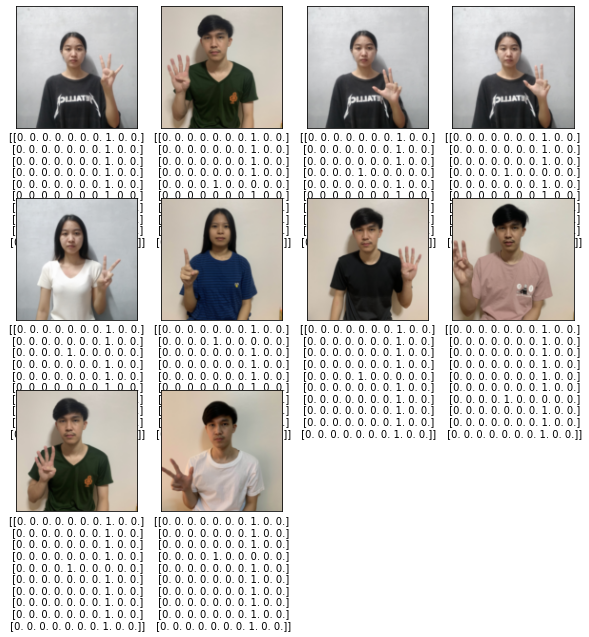

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[train_labels[i].astype(int)])
plt.show()

###Implement Model & Train

In [ ]:
img_rows, img_cols = 128,128
input_shape = (img_rows, img_cols, 3) #Grey 1, RGB 3
num_classes = 10

indian_model = Sequential()
#1. CNN LAYER
indian_model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'Same',activation='relu',input_shape=input_shape))

#2. CNN LAYER
indian_model.add(Conv2D(16, (3, 3) , activation='relu'))
indian_model.add(MaxPooling2D(pool_size=(2, 2)))

indian_model.add(Dropout(0.5))

#FULLY CONNECTED LAYER
indian_model.add(Flatten())
indian_model.add(Dense(64, activation='relu'))

#OUTPUT LAYER
indian_model.add(Dense(num_classes, activation='softmax'))
indian_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63504)             0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 64)                4064320   
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10)                6

Train

In [ ]:
indian_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy']) 

In [ ]:
start = time.time()
history = indian_model.fit(train_images, train_labels,batch_size=128,epochs=20,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 2.3409 - accuracy: 0.1097 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 2.3131 - accuracy: 0.0875 - val_loss: 2.3082 - val_accuracy: 0.0833
Epoch 3/20
6/6 [==============================] - 15s 2s/step - loss: 2.3043 - accuracy: 0.1111 - val_loss: 2.3025 - val_accuracy: 0.1167
Epoch 4/20
6/6 [==============================] - 15s 2s/step - loss: 2.3023 - accuracy: 0.1069 - val_loss: 2.3033 - val_accuracy: 0.0917
Epoch 5/20
6/6 [==============================] - 15s 2s/step - loss: 2.3078 - accuracy: 0.1125 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 2.3033 - accuracy: 0.0944 - val_loss: 2.3030 - val_accuracy: 0.1167
Epoch 7/20
6/6 [==============================] - 15s 2s/step - loss: 2.2995 - accuracy: 0.1139 - val_loss: 2.3046 - val_accuracy: 0.0750
Epoch 8/20
6/6 [==================

In [ ]:
start = time.time()
history_2 = indian_model.fit(train_images, train_labels,batch_size=128,epochs=100,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/100
6/6 [==============================] - 15s 3s/step - loss: 2.2858 - accuracy: 0.1167 - val_loss: 2.3089 - val_accuracy: 0.1292
Epoch 2/100
6/6 [==============================] - 15s 2s/step - loss: 2.2910 - accuracy: 0.1403 - val_loss: 2.2990 - val_accuracy: 0.1208
Epoch 3/100
6/6 [==============================] - 15s 2s/step - loss: 2.2738 - accuracy: 0.1444 - val_loss: 2.2978 - val_accuracy: 0.1417
Epoch 4/100
6/6 [==============================] - 15s 3s/step - loss: 2.2737 - accuracy: 0.1361 - val_loss: 2.2976 - val_accuracy: 0.1542
Epoch 5/100
6/6 [==============================] - 15s 3s/step - loss: 2.2655 - accuracy: 0.1639 - val_loss: 2.3053 - val_accuracy: 0.0958
Epoch 6/100
6/6 [==============================] - 15s 3s/step - loss: 2.2672 - accuracy: 0.1569 - val_loss: 2.3031 - val_accuracy: 0.1458
Epoch 7/100
6/6 [==============================] - 15s 3s/step - loss: 2.2607 - accuracy: 0.1639 - val_loss: 2.3113 - val_accuracy: 0.1083
Epoch 8/100
6/6 [==========

Test accuracy

In [ ]:
test_loss, test_acc = indian_model.evaluate(test_images, test_labels,verbose=2)
print('test_acc:', test_acc)

8/8 - 1s - loss: 1.8714 - accuracy: 0.3333
test_acc: 0.3333333432674408


In [ ]:
training_time = end-start
print(f'Traning time (s) : {training_time}')

Traning time (s) : 1521.9762239456177


Graph

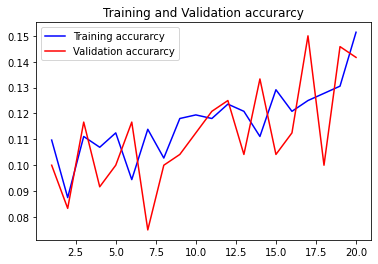

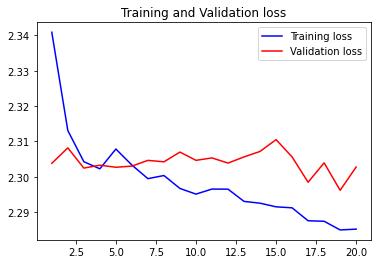

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

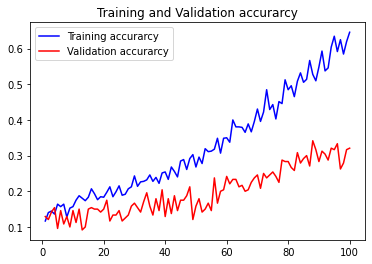

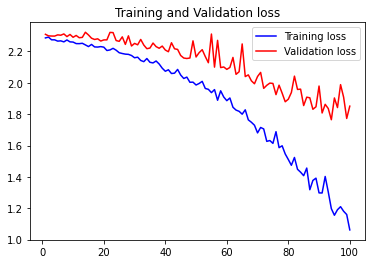

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Save model

In [ ]:
# This will save CNN architecture in 'my_model' directory
indian_model.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/My models/Test0-9')

INFO:tensorflow:Assets written to: /content/drive/My Drive/All Dataset/Dataset09/my_model2/assets


###Predict

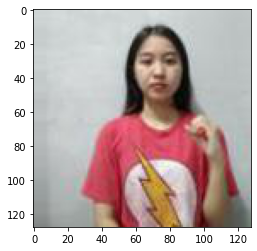

(1, 128, 128, 3)


In [ ]:
# Load image to visualize intermediate activations
from keras.preprocessing import image
img_path = '/content/drive/My Drive/All Dataset/keep/Dataset09/Dataset0-9_test/test/0/aug__0_544.jpg'
img = image.load_img(img_path, target_size=(img_size, img_size))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
# predicting images
labels = ['0', '1', '2','3','4','5','6','7','8','9']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = indian_model.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: 0


In [ ]:
# predicting images 100epoch
labels = ['0', '1', '2','3','4','5','6','7','8','9']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = indian_model.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: 3


###Visualize

In [ ]:
%cd 'drive/My Drive/All Dataset/Dataset/Github/ThaiSignLanguage/Visualize/'

/content/drive/.shortcut-targets-by-id/1rS5BI-vubAqulslTEvEPgx_gmWrqsEvl/All Dataset/Dataset/Github/ThaiSignLanguage/Visualize


filtered image

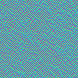

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


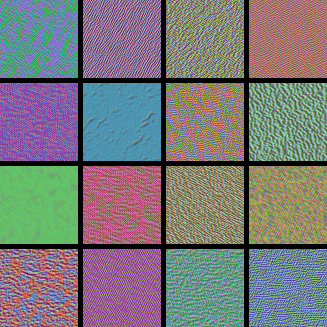

In [ ]:
#from google.colab import files
#src = list(files.upload().values())[0]
#open('/content/drive/My Drive/All Dataset/ThaiSignLanguage/visualize_filter.py','wb').write(src)

import visualize_filter
LayerName = 'conv2d'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

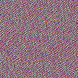

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


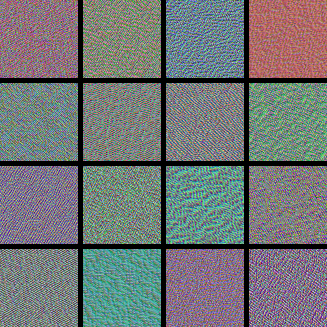

In [ ]:
LayerName = 'conv2d_1'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

In [ ]:
LayerName = 'max_pooling2d'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

filter

Layer # 0 , Shape : (1, 128, 128, 16)


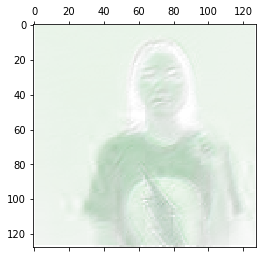

Layer # 1 , Shape : (1, 126, 126, 16)


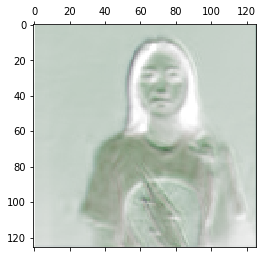

Layer # 2 , Shape : (1, 63, 63, 16)


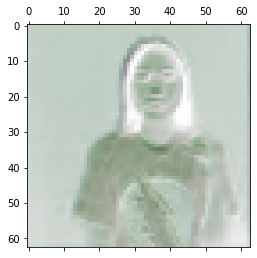

Layer # 3 , Shape : (1, 63, 63, 16)


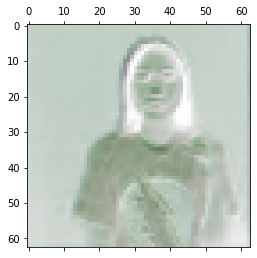

In [ ]:
# Visualize intermediate activations
layer_outputs = [layer.output for layer in indian_model.layers]
 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=indian_model.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 
i = 0

for act in activations:
  if(len(act.shape) == 4): # Show only convolution and pooling layers
    print('Layer #', i, ', Shape :', act.shape)
    i += 1
    plt.matshow(act.squeeze()[ :, :, 0:4])
    plt.show()


# Dataset 60:20:20 | 4 Layer (2CL, 2FC) 16 filter | 20 epochs -> Best Model of India ----------------- TT

###Make dataset [ImageDataGenerator] -> Path

In [ ]:
root_dir = '/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/'
dataset_dir = os.path.join(root_dir, 'Dataset0-9_60:20:20')
train_dir = os.path.join(dataset_dir,'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'val')

Trian

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
train_generator = train_datagen.flow_from_directory(train_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 10297 images belonging to 10 classes.


Test

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
test_generator = train_datagen.flow_from_directory(test_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 3441 images belonging to 10 classes.


Val

In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
val_generator = val_datagen.flow_from_directory(val_dir, # this is where you specify the path to the main data folder
                                                 target_size=(128, 128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 seed=123,
                                                 shuffle=True)

Found 3430 images belonging to 10 classes.


In [ ]:
img_size = 128

###train_images, train_labels, val_images, val_labels, test_images, test_labels

In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
# Settings:
img_size = 128
grayscale_images = False
num_class = 10
#test_size = 0.2

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


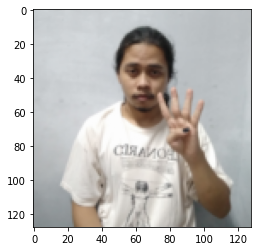

In [ ]:

root_dir = "/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset_Original/" 

def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img
def get_dataset(data_dir):
    # Getting all data from data path:
    try:
        x_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_images.npy')
        y_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_labels.npy') 
        x_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_images.npy')
        y_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_labels.npy') 
        x_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_images.npy')
        y_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_labels.npy') 
        train_images,  test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=1 - train_ratio,random_state=42)
        val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 
    except:
      # Geting labels
        #labels = listdir(dataset_path)  
        labels = ['0', '1', '2','3','4','5','6','7','8','9']
        train_images = [] 
        train_labels = []  
        for label in labels: 
          path = os.path.join(data_dir, label)
          class_num = labels.index(label)
          for img in os.listdir(path):
              # Create dateset:
                data = get_img(path + '/' + img)
                train_images.append(data)
                train_labels.append(class_num)
        train_images = np.array(train_images).astype('float32')
        train_labels = np.array(train_labels).astype('float32')
        train_labels = to_categorical(train_labels,num_class)
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/'):
            os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/')
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_images.npy', train_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_labels.npy', train_labels)
        train_images,  test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=1 - train_ratio,random_state=42)
        val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/'):
            os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/')
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_images.npy',  val_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_labels.npy', val_labels)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_images.npy',  test_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_labels.npy', test_labels)
    return train_images, val_images, test_images, train_labels,  val_labels,  test_labels

if __name__ == '__main__':
  train_images, val_images, test_images, train_labels,  val_labels,  test_labels = get_dataset(root_dir)
  # Normalize pixel values to be between 0 and 1
  #train_images, test_images, val_images = train_images / 255.0, test_images / 255.0 , val_images / 255.0
  image_index = 13
  print(train_labels[image_index]) 
  plt.imshow(np.reshape(train_images[image_index],[128,128,3]))

In [ ]:
print('Train:',np.shape(train_images))
print('Train:',np.shape(val_images))
print('Train:',np.shape(test_images))
print('Train:',np.shape(train_labels))

Train: (720, 128, 128, 3)
Train: (240, 128, 128, 3)
Train: (240, 128, 128, 3)
Train: (720, 10)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


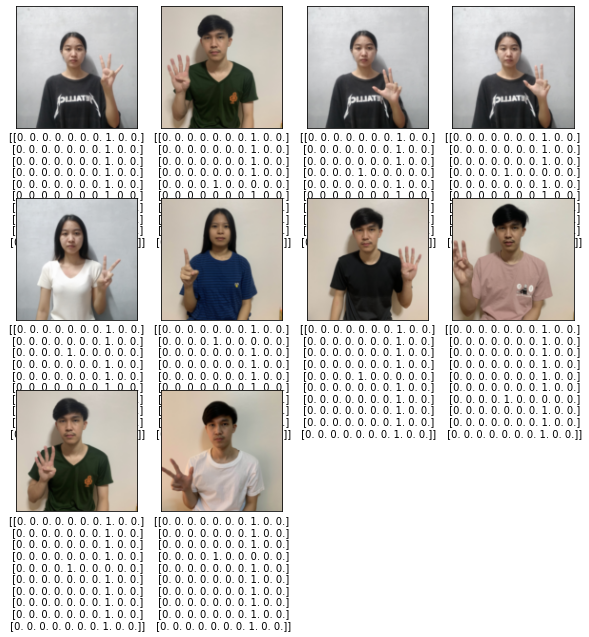

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[train_labels[i].astype(int)])
plt.show()

###Implement Model & Train

In [ ]:
img_rows, img_cols = 128,128
input_shape = (img_rows, img_cols, 3) #Grey 1, RGB 3
num_classes = 10

indian_model = Sequential()
#1. CNN LAYER
indian_model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'Same',activation='relu',input_shape=input_shape))

#2. CNN LAYER
indian_model.add(Conv2D(16, (3, 3) , activation='relu'))
indian_model.add(MaxPooling2D(pool_size=(2, 2)))

indian_model.add(Dropout(0.5))

#FULLY CONNECTED LAYER
indian_model.add(Flatten())
indian_model.add(Dense(64, activation='relu'))

#OUTPUT LAYER
indian_model.add(Dense(num_classes, activation='softmax'))
indian_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63504)             0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 64)                4064320   
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10)                6

Train

In [ ]:
indian_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy']) 

In [ ]:
start = time.time()
history = indian_model.fit(train_images, train_labels,batch_size=128,epochs=20,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 2.3409 - accuracy: 0.1097 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 2.3131 - accuracy: 0.0875 - val_loss: 2.3082 - val_accuracy: 0.0833
Epoch 3/20
6/6 [==============================] - 15s 2s/step - loss: 2.3043 - accuracy: 0.1111 - val_loss: 2.3025 - val_accuracy: 0.1167
Epoch 4/20
6/6 [==============================] - 15s 2s/step - loss: 2.3023 - accuracy: 0.1069 - val_loss: 2.3033 - val_accuracy: 0.0917
Epoch 5/20
6/6 [==============================] - 15s 2s/step - loss: 2.3078 - accuracy: 0.1125 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 2.3033 - accuracy: 0.0944 - val_loss: 2.3030 - val_accuracy: 0.1167
Epoch 7/20
6/6 [==============================] - 15s 2s/step - loss: 2.2995 - accuracy: 0.1139 - val_loss: 2.3046 - val_accuracy: 0.0750
Epoch 8/20
6/6 [==================

In [ ]:
start = time.time()
history_2 = indian_model.fit(train_images, train_labels,batch_size=128,epochs=100,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/100
6/6 [==============================] - 15s 3s/step - loss: 2.2858 - accuracy: 0.1167 - val_loss: 2.3089 - val_accuracy: 0.1292
Epoch 2/100
6/6 [==============================] - 15s 2s/step - loss: 2.2910 - accuracy: 0.1403 - val_loss: 2.2990 - val_accuracy: 0.1208
Epoch 3/100
6/6 [==============================] - 15s 2s/step - loss: 2.2738 - accuracy: 0.1444 - val_loss: 2.2978 - val_accuracy: 0.1417
Epoch 4/100
6/6 [==============================] - 15s 3s/step - loss: 2.2737 - accuracy: 0.1361 - val_loss: 2.2976 - val_accuracy: 0.1542
Epoch 5/100
6/6 [==============================] - 15s 3s/step - loss: 2.2655 - accuracy: 0.1639 - val_loss: 2.3053 - val_accuracy: 0.0958
Epoch 6/100
6/6 [==============================] - 15s 3s/step - loss: 2.2672 - accuracy: 0.1569 - val_loss: 2.3031 - val_accuracy: 0.1458
Epoch 7/100
6/6 [==============================] - 15s 3s/step - loss: 2.2607 - accuracy: 0.1639 - val_loss: 2.3113 - val_accuracy: 0.1083
Epoch 8/100
6/6 [==========

Test accuracy

In [ ]:
test_loss, test_acc = indian_model.evaluate(test_images, test_labels,verbose=2)
print('test_acc:', test_acc)

8/8 - 1s - loss: 1.8714 - accuracy: 0.3333
test_acc: 0.3333333432674408


In [ ]:
training_time = end-start
print(f'Traning time (s) : {training_time}')

Traning time (s) : 1521.9762239456177


Graph

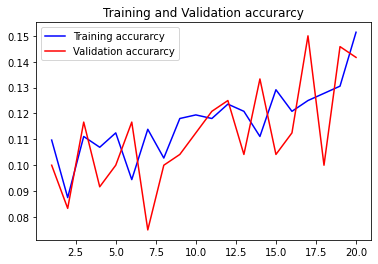

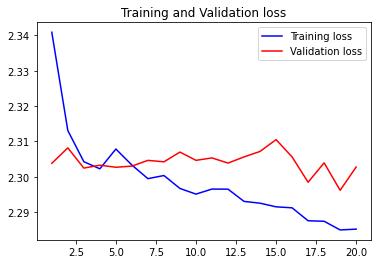

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

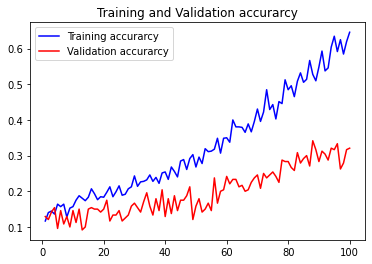

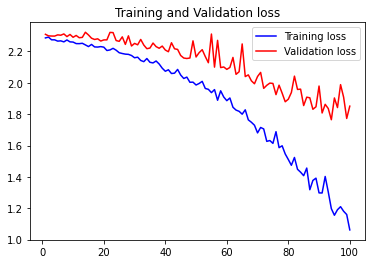

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Save model

In [ ]:
# This will save CNN architecture in 'my_model' directory
indian_model.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/My models/Test0-9')

INFO:tensorflow:Assets written to: /content/drive/My Drive/All Dataset/Dataset09/my_model2/assets


###Predict

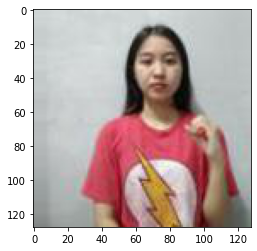

(1, 128, 128, 3)


In [ ]:
# Load image to visualize intermediate activations
from keras.preprocessing import image
img_path = '/content/drive/My Drive/All Dataset/keep/Dataset09/Dataset0-9_test/test/0/aug__0_544.jpg'
img = image.load_img(img_path, target_size=(img_size, img_size))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
# predicting images
labels = ['0', '1', '2','3','4','5','6','7','8','9']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = indian_model.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: 0


In [ ]:
# predicting images 100epoch
labels = ['0', '1', '2','3','4','5','6','7','8','9']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = indian_model.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: 3


###Visualize

In [ ]:
%cd 'drive/My Drive/All Dataset/Dataset/Github/ThaiSignLanguage/Visualize/'

/content/drive/.shortcut-targets-by-id/1rS5BI-vubAqulslTEvEPgx_gmWrqsEvl/All Dataset/Dataset/Github/ThaiSignLanguage/Visualize


filtered image

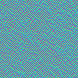

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


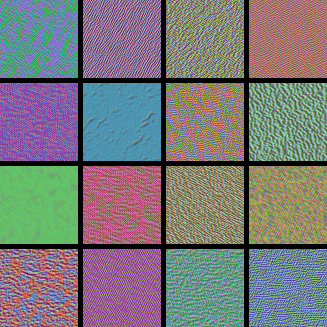

In [ ]:
#from google.colab import files
#src = list(files.upload().values())[0]
#open('/content/drive/My Drive/All Dataset/ThaiSignLanguage/visualize_filter.py','wb').write(src)

import visualize_filter
LayerName = 'conv2d'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

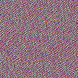

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


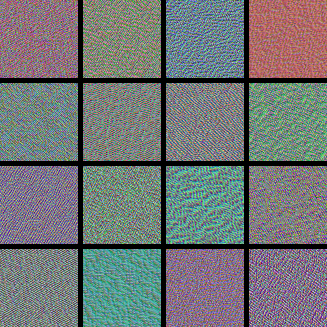

In [ ]:
LayerName = 'conv2d_1'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

In [ ]:
LayerName = 'max_pooling2d'
model=indian_model
visualize_filter.visualize_filters(img_size, img_size, LayerName, model)

filter

Layer # 0 , Shape : (1, 128, 128, 16)


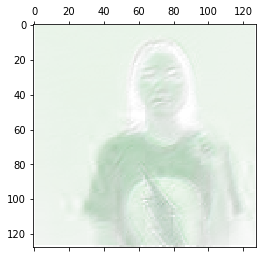

Layer # 1 , Shape : (1, 126, 126, 16)


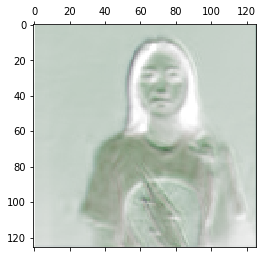

Layer # 2 , Shape : (1, 63, 63, 16)


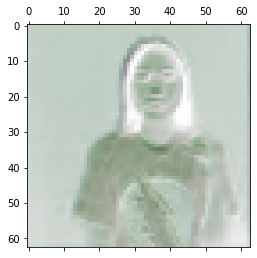

Layer # 3 , Shape : (1, 63, 63, 16)


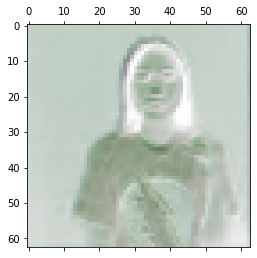

In [ ]:
# Visualize intermediate activations
layer_outputs = [layer.output for layer in indian_model.layers]
 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=indian_model.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 
i = 0

for act in activations:
  if(len(act.shape) == 4): # Show only convolution and pooling layers
    print('Layer #', i, ', Shape :', act.shape)
    i += 1
    plt.matshow(act.squeeze()[ :, :, 0:4])
    plt.show()


# Dataset 60:20:20 | 4 Layer (2CL, 2FC) 16 filter 


###train_images, train_labels, val_images, val_labels, test_images, test_labels

In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
# Settings:
img_size = 128
grayscale_images = False
num_class = 10
#test_size = 0.2

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


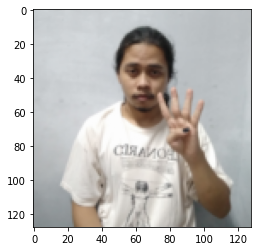

In [ ]:

root_dir = "/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset_Original/" 

def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img
def get_dataset(data_dir):
    # Getting all data from data path:
    try:
        x_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_images.npy')
        y_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_labels.npy') 
        x_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_images.npy')
        y_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_labels.npy') 
        x_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_images.npy')
        y_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_labels.npy') 
        train_images,  test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=1 - train_ratio,random_state=42)
        val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 
    except:
      # Geting labels
        #labels = listdir(dataset_path)  
        labels = ['0', '1', '2','3','4','5','6','7','8','9']
        train_images = [] 
        train_labels = []  
        for label in labels: 
          path = os.path.join(data_dir, label)
          class_num = labels.index(label)
          for img in os.listdir(path):
              # Create dateset:
                data = get_img(path + '/' + img)
                train_images.append(data)
                train_labels.append(class_num)
        train_images = np.array(train_images).astype('float32')
        train_labels = np.array(train_labels).astype('float32')
        train_labels = to_categorical(train_labels,num_class)
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/'):
            os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/')
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_images.npy', train_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/train_labels.npy', train_labels)
        train_images,  test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=1 - train_ratio,random_state=42)
        val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42) 
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/'):
            os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/')
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_images.npy',  val_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/val_labels.npy', val_labels)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_images.npy',  test_images)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Numpy/test_labels.npy', test_labels)
    return train_images, val_images, test_images, train_labels,  val_labels,  test_labels

if __name__ == '__main__':
  train_images, val_images, test_images, train_labels,  val_labels,  test_labels = get_dataset(root_dir)
  # Normalize pixel values to be between 0 and 1
  #train_images, test_images, val_images = train_images / 255.0, test_images / 255.0 , val_images / 255.0
  image_index = 13
  print(train_labels[image_index]) 
  plt.imshow(np.reshape(train_images[image_index],[128,128,3]))

In [ ]:
print('Train:',np.shape(train_images))
print('Train:',np.shape(val_images))
print('Train:',np.shape(test_images))
print('Train:',np.shape(train_labels))

Train: (720, 128, 128, 3)
Train: (240, 128, 128, 3)
Train: (240, 128, 128, 3)
Train: (720, 10)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


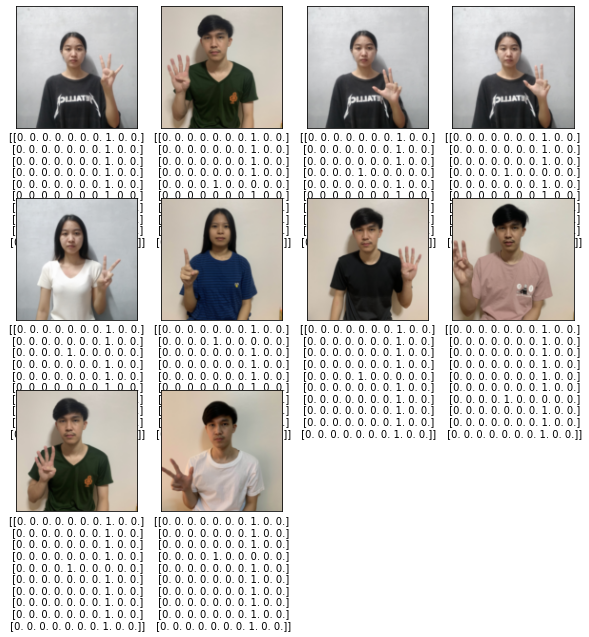

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[train_labels[i].astype(int)])
plt.show()

###Implement Model & Train

In [ ]:
img_rows, img_cols = 128,128
input_shape = (img_rows, img_cols, 3) #Grey 1, RGB 3
num_classes = 10

indian_model = Sequential()
#1. CNN LAYER
indian_model.add(Conv2D(filters=16, kernel_size=(3, 3), padding = 'Same',activation='relu',input_shape=input_shape))

#2. CNN LAYER
indian_model.add(Conv2D(16, (3, 3) , activation='relu'))
indian_model.add(MaxPooling2D(pool_size=(2, 2)))

indian_model.add(Dropout(0.5))

#FULLY CONNECTED LAYER
indian_model.add(Flatten())
indian_model.add(Dense(64, activation='relu'))

#OUTPUT LAYER
indian_model.add(Dense(num_classes, activation='softmax'))
indian_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63504)             0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 64)                4064320   
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 10)                6

Train

In [ ]:
indian_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy']) 

In [ ]:
start = time.time()
history = indian_model.fit(train_images, train_labels,batch_size=128,epochs=20,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 2.3409 - accuracy: 0.1097 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 2.3131 - accuracy: 0.0875 - val_loss: 2.3082 - val_accuracy: 0.0833
Epoch 3/20
6/6 [==============================] - 15s 2s/step - loss: 2.3043 - accuracy: 0.1111 - val_loss: 2.3025 - val_accuracy: 0.1167
Epoch 4/20
6/6 [==============================] - 15s 2s/step - loss: 2.3023 - accuracy: 0.1069 - val_loss: 2.3033 - val_accuracy: 0.0917
Epoch 5/20
6/6 [==============================] - 15s 2s/step - loss: 2.3078 - accuracy: 0.1125 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 2.3033 - accuracy: 0.0944 - val_loss: 2.3030 - val_accuracy: 0.1167
Epoch 7/20
6/6 [==============================] - 15s 2s/step - loss: 2.2995 - accuracy: 0.1139 - val_loss: 2.3046 - val_accuracy: 0.0750
Epoch 8/20
6/6 [==================

In [ ]:
start = time.time()
history_2 = indian_model.fit(train_images, train_labels,batch_size=128,epochs=100,validation_data=(val_images, val_labels))
end = time.time()

Epoch 1/100
6/6 [==============================] - 15s 3s/step - loss: 2.2858 - accuracy: 0.1167 - val_loss: 2.3089 - val_accuracy: 0.1292
Epoch 2/100
6/6 [==============================] - 15s 2s/step - loss: 2.2910 - accuracy: 0.1403 - val_loss: 2.2990 - val_accuracy: 0.1208
Epoch 3/100
6/6 [==============================] - 15s 2s/step - loss: 2.2738 - accuracy: 0.1444 - val_loss: 2.2978 - val_accuracy: 0.1417
Epoch 4/100
6/6 [==============================] - 15s 3s/step - loss: 2.2737 - accuracy: 0.1361 - val_loss: 2.2976 - val_accuracy: 0.1542
Epoch 5/100
6/6 [==============================] - 15s 3s/step - loss: 2.2655 - accuracy: 0.1639 - val_loss: 2.3053 - val_accuracy: 0.0958
Epoch 6/100
6/6 [==============================] - 15s 3s/step - loss: 2.2672 - accuracy: 0.1569 - val_loss: 2.3031 - val_accuracy: 0.1458
Epoch 7/100
6/6 [==============================] - 15s 3s/step - loss: 2.2607 - accuracy: 0.1639 - val_loss: 2.3113 - val_accuracy: 0.1083
Epoch 8/100
6/6 [==========

Test accuracy

In [ ]:
test_loss, test_acc = indian_model.evaluate(test_images, test_labels,verbose=2)
print('test_acc:', test_acc)

8/8 - 1s - loss: 1.8714 - accuracy: 0.3333
test_acc: 0.3333333432674408


In [ ]:
training_time = end-start
print(f'Traning time (s) : {training_time}')

Traning time (s) : 1521.9762239456177


Graph

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Save model